# ANALYZE EBAY PRODUCT

In [88]:
# Import all libraries required

import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error


### Extract the data from Ebay website

In [7]:
# Specify the URL of the Ebay item

url = 'https://www.ebay.com/sch/267/i.html?_from=R40&_nkw=Business+Intelligence+&rt=nc'

In [8]:
# create an empty list to store the scraped data
product_data = []

# iterate over the page numbers
for page_num in range(1, 11):   # scrape data from page 1 to 10
    # create the url for the current page
    url = url.format(page_num=page_num)

In [9]:
#send a GET request to the URL and extract the HTML content

response = requests.get(url)
content = response.content

In [10]:
#Use Beautiful Soup to parse the HTML content

soup = BeautifulSoup(content, 'html.parser')

In [11]:
#Extract the product information needed
items = soup.find_all('div', {'class': 's-item__wrapper clearfix'})
    

for item in items:
    title = item.find('div', {'class': 's-item__title'}).text.strip()
    
    price_sold = float(item.find('span', {'class': 's-item__price'}).text.replace('$','').replace(',','').strip())
    shipping_cost = item.find('span', {'class': 's-item__shipping s-item__logisticsCost'})
    if shipping_cost:
        shipping_cost = shipping_cost.text.replace('+','').replace('$','').replace(',','').strip()
    else:
        shipping_cost = 0.0
    item_location = item.find('span', {'class': 's-item__location s-item__itemLocation'})
    if item_location:
        item_location = item_location.text.replace('from','').strip()
    else:
        item_location = ''
    item_seller = item.find('span', {'class':'s-item__seller-info'})
    if item_seller:
        item_seller = item_seller.text.strip()
    else:
        item_seller = ''
    link = item.find('a', {'class': 's-item__link'})['href']
    product_data.append([title, price_sold, shipping_cost, item_location, item_seller, link])
    
B_books = pd.DataFrame(product_data, columns=['Title', 'Price_sold', 'Shipping_cost', 'Item_location','Item_seller', 'Link'])
print(B_books.head())

                                               Title  Price_sold  \
0                                       Shop on eBay       20.00   
1                                       Shop on eBay       20.00   
2  Business Intelligence for Business Development...       80.47   
3  Business Intelligence: A Managerial Perspectiv...      181.77   
4  Business Intelligence for Business Development...       87.14   

   Shipping_cost  Item_location                      Item_seller  \
0            0.0                                                   
1            0.0                                                   
2  3.99 shipping  United States    rarewaves-usa (411,376) 97.4%   
3  2.88 shipping  United States  rarewaves-usa-ca (53,650) 97.9%   
4  2.88 shipping  United States  rarewaves-usa-ca (53,650) 97.9%   

                                                Link  
0  https://ebay.com/itm/123456?itmmeta=012DEW30YG...  
1  https://ebay.com/itm/123456?itmmeta=012DEW30YG...  
2  https://www.eb

### Data Pre-processing

In [12]:
#Display the first 5 rows of the Business Inteligence(BI) books

B_books.head(5)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link
0,Shop on eBay,20.00,0.0,,,https://ebay.com/itm/123456?itmmeta=012DEW30YG...
1,Shop on eBay,20.00,0.0,,,https://ebay.com/itm/123456?itmmeta=012DEW30YG...
2,Business Intelligence for Business Development...,80.47,3.99 shipping,United States,"rarewaves-usa (411,376) 97.4%",https://www.ebay.com/itm/296563805512?epid=215...
3,Business Intelligence: A Managerial Perspectiv...,181.77,2.88 shipping,United States,"rarewaves-usa-ca (53,650) 97.9%",https://www.ebay.com/itm/315573388141?epid=230...
4,Business Intelligence for Business Development...,87.14,2.88 shipping,United States,"rarewaves-usa-ca (53,650) 97.9%",https://www.ebay.com/itm/315433660593?epid=215...


In [13]:
#Seperte item rating from the item seller
B_books[['Seller_name','Seller_feedback', 'Seller_Rating%']] = B_books['Item_seller'].str.split(' ', expand=True)
B_books.head(10)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
0,Shop on eBay,20.00,0.0,,,https://ebay.com/itm/123456?itmmeta=012DEW30YG...,,None,None
1,Shop on eBay,20.00,0.0,,,https://ebay.com/itm/123456?itmmeta=012DEW30YG...,,None,None
2,Business Intelligence for Business Development...,80.47,3.99 shipping,United States,"rarewaves-usa (411,376) 97.4%",https://www.ebay.com/itm/296563805512?epid=215...,rarewaves-usa,"(411,376)",97.4%
3,Business Intelligence: A Managerial Perspectiv...,181.77,2.88 shipping,United States,"rarewaves-usa-ca (53,650) 97.9%",https://www.ebay.com/itm/315573388141?epid=230...,rarewaves-usa-ca,"(53,650)",97.9%
4,Business Intelligence for Business Development...,87.14,2.88 shipping,United States,"rarewaves-usa-ca (53,650) 97.9%",https://www.ebay.com/itm/315433660593?epid=215...,rarewaves-usa-ca,"(53,650)",97.9%
5,Business Intelligence: A Managerial Perspectiv...,169.37,3.99 shipping,United States,"rarewaves-usa (411,376) 97.4%",https://www.ebay.com/itm/405112893997?epid=230...,rarewaves-usa,"(411,376)",97.4%
6,Karen Berman Joe Knight Financial Intelligence...,31.43,1.95 shipping,United Kingdom,"rarewaves-outlet (1,190,931) 98.3%",https://www.ebay.com/itm/355806091267?epid=965...,rarewaves-outlet,"(1,190,931)",98.3%
7,The Definitive Guide to DAX: Business intellig...,36.51,7.99 shipping,United States,"textbooks_xpress (3,074) 97.6%",https://www.ebay.com/itm/285408096461?epid=242...,textbooks_xpress,"(3,074)",97.6%
8,New ListingThe Intelligent Investor: A Book of...,5.75,26.86 shipping,United States,"kulelibooks (5,314) 99.2%",https://www.ebay.com/itm/365046174816?epid=196...,kulelibooks,"(5,314)",99.2%
9,MBM 80 Advanced GROW Coaching Cards/Flash Card...,25.55,25.61 shipping,United Kingdom,makingbusinessmatter (40) 100%,https://www.ebay.com/itm/186166505073?hash=ite...,makingbusinessmatter,(40),100%


In [14]:
B_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            74 non-null     object 
 1   Price_sold       74 non-null     float64
 2   Shipping_cost    74 non-null     object 
 3   Item_location    74 non-null     object 
 4   Item_seller      74 non-null     object 
 5   Link             74 non-null     object 
 6   Seller_name      74 non-null     object 
 7   Seller_feedback  72 non-null     object 
 8   Seller_Rating%   72 non-null     object 
dtypes: float64(1), object(8)
memory usage: 5.3+ KB


In [15]:
B_books.shape

(74, 9)

In [16]:
#check the data for null values
B_books.isnull().sum()

Title              0
Price_sold         0
Shipping_cost      0
Item_location      0
Item_seller        0
Link               0
Seller_name        0
Seller_feedback    2
Seller_Rating%     2
dtype: int64

In [17]:
# Calculate percentage of missing values
missing_percentage = (B_books.isnull().sum() / len(B_books)) * 100
print(missing_percentage)


Title              0.000000
Price_sold         0.000000
Shipping_cost      0.000000
Item_location      0.000000
Item_seller        0.000000
Link               0.000000
Seller_name        0.000000
Seller_feedback    2.702703
Seller_Rating%     2.702703
dtype: float64


In [18]:
# Drop rows with any NaN values
B_books_cleaned = B_books.dropna(inplace = True)

In [19]:
#Remove the brackets from the 'Seller_feedback' column by calling the str.replace() 
B_books['Seller_feedback'] = B_books['Seller_feedback'].str.replace('[(),]', '', regex=True)


#Remove the Percentage % sign from the 'Seller_Rating%' column
B_books['Seller_Rating%'] = B_books['Seller_Rating%'].str.replace('%', '', regex=True)


#Convert the column datatype using the astype()

B_books['Seller_feedback'] = B_books['Seller_feedback'].astype(int)
B_books['Seller_Rating%'] = B_books['Seller_Rating%'].astype(float)
B_books.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Item_seller,Link,Seller_name,Seller_feedback,Seller_Rating%
2,Business Intelligence for Business Development...,80.47,3.99 shipping,United States,"rarewaves-usa (411,376) 97.4%",https://www.ebay.com/itm/296563805512?epid=215...,rarewaves-usa,411376,97.4
3,Business Intelligence: A Managerial Perspectiv...,181.77,2.88 shipping,United States,"rarewaves-usa-ca (53,650) 97.9%",https://www.ebay.com/itm/315573388141?epid=230...,rarewaves-usa-ca,53650,97.9


In [70]:
# Convert 'Shipping_cost' to string to ensure compatibility with .str methods
B_books['Shipping_cost'] = B_books['Shipping_cost'].astype(str)

# Extract numeric values from the 'Shipping_cost' column, ignoring the word 'shipping'
B_books['Shipping_cost_cleaned'] = B_books['Shipping_cost'].str.extract(r'(\d+\.\d+|\d+)')

# Convert cleaned values in 'Shipping_cost_cleaned' to numeric, using 'errors="coerce"' to handle non-numeric values
B_books['Shipping_cost_cleaned'] = pd.to_numeric(B_books['Shipping_cost_cleaned'], errors='coerce')

# Replace NaN values in 'Shipping_cost_cleaned' with 0
B_books['Shipping_cost_cleaned'].fillna(0, inplace=True)

# Create the 'shipping_type' column
# Assign 'Paid Shipping' for rows with numeric values in 'Shipping_cost_cleaned'
# Assign 'Free International Shipping' for rows with NaN values in 'Shipping_cost_cleaned'
B_books['shipping_type'] = np.where(B_books['Shipping_cost_cleaned'].notna(), 'Paid Shipping', 'Free International Shipping')

In [71]:
B_books.head(45)

,Title,Price_sold,Shipping_cost,Item_location,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_cleaned,shipping_type
2,Business Intelligence for Business Development...,80.47,3.99,United States,rarewaves-usa,411376,97.4,3.99,Paid Shipping
3,Business Intelligence: A Managerial Perspectiv...,181.77,2.88,United States,rarewaves-usa-ca,53650,97.9,2.88,Paid Shipping
4,Business Intelligence for Business Development...,87.14,2.88,United States,rarewaves-usa-ca,53650,97.9,2.88,Paid Shipping
5,Business Intelligence: A Managerial Perspectiv...,169.37,3.99,United States,rarewaves-usa,411376,97.4,3.99,Paid Shipping
6,Karen Berman Joe Knight Financial Intelligence...,31.43,1.95,United Kingdom,rarewaves-outlet,1190931,98.3,1.95,Paid Shipping
7,The Definitive Guide to DAX: Business intellig...,36.51,7.99,United States,textbooks_xpress,3074,97.6,7.99,Paid Shipping
8,New ListingThe Intelligent Investor: A Book of...,5.75,26.86,United States,kulelibooks,5314,99.2,26.86,Paid Shipping
9,MBM 80 Advanced GROW Coaching Cards/Flash Card...,25.55,25.61,United Kingdom,makingbusinessmatter,40,100.0,25.61,Paid Shipping
10,"Business Intelligence, Analytics, and Data Sci...",23.99,15.99,United States,textbooks_xpress,3074,97.6,15.99,Paid Shipping
11,"Definitive Guide to DAX, The: Business intelli...",25.60,9.6,United Kingdom,worldofbooks08,9696491,98.9,9.60,Paid Shipping


### Exploratory Data Analysis

#### Problem statement:
Determining the Average Price of Books: What is the average price of books in the dataset?

Calculating the Average Shipping Cost: How can we compute the average shipping cost associated with the books?

Analyzing Seller Feedback and Ratings: What is the average feedback score and rating given by sellers, and how can we assess their impact?

Identifying Shipping Types: What types of shipping methods are being used, and how do they vary across the dataset?

Examining Item Locations: How do the locations of items impact their pricing or shipping cost?

Exploring Price vs. Shipping Cost: What is the relationship between the price of books and their shipping cost?

Identifying Top Sellers: Who are the top sellers based on the number of books sold or other relevant metrics?

Analyzing Price Distribution by Seller: How is the distribution of book prices affected by different sellers?

Average price of books: $30.27


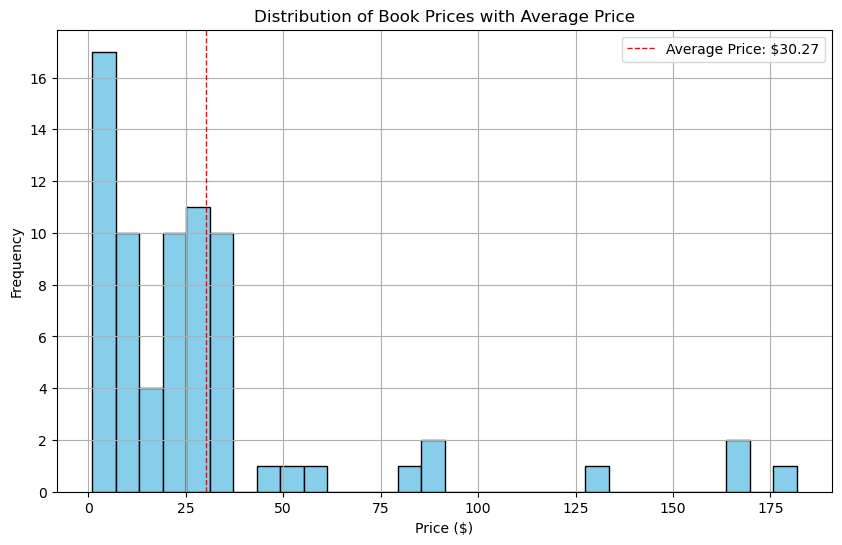

In [44]:
#Calculate the average price of books
average_price = B_books['Price_sold'].mean()

# Print the average price
print(f"Average price of books: ${average_price:.2f}")

# Visualization: Histogram with Average Price Line
plt.figure(figsize=(10, 6))
plt.hist(B_books['Price_sold'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.axvline(average_price, color='red', linestyle='dashed', linewidth=1, label=f'Average Price: ${average_price:.2f}')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Book Prices with Average Price')
plt.legend()
plt.grid(True)
plt.show()

The average price of $32.92 represents a central value around which book prices in the dataset are distributed. This suggests that most book prices are clustered around this value, although individual prices may vary.
The average price can assist in evaluating whether specific books are priced competitively or above market norms. It can also aid in pricing strategies and marketing decisions.

In [45]:
# Convert 'Seller_feedback' to numeric, handling errors by setting them to NaN
B_books['Seller_feedback'] = pd.to_numeric(B_books['Seller_feedback'], errors='coerce')

# Ensure 'Seller_Rating%' is treated as a string before removing '%'
B_books['Seller_Rating%'] = B_books['Seller_Rating%'].astype(str).str.replace('%', '', regex=True)

# Convert 'Seller_Rating%' to float
B_books['Seller_Rating%'] = pd.to_numeric(B_books['Seller_Rating%'], errors='coerce')

# Calculate average seller feedback and rating
average_feedback = B_books['Seller_feedback'].mean()
average_rating = B_books['Seller_Rating%'].mean()

print(f"Average Seller Feedback: {average_feedback:.2f}")
print(f"Average Seller Rating: {average_rating:.2f}")

Average Seller Feedback: 1097952.39
Average Seller Rating: 98.74


In [46]:
# Calculate the correlation matrix
correlation_matrix = B_books[['Seller_feedback', 'Seller_Rating%', 'Price_sold', 'Shipping_cost_cleaned']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       Seller_feedback  Seller_Rating%  Price_sold  \
Seller_feedback               1.000000        0.039319    0.002818   
Seller_Rating%                0.039319        1.000000   -0.122501   
Price_sold                    0.002818       -0.122501    1.000000   
Shipping_cost_cleaned        -0.280570        0.371208   -0.203832   

                       Shipping_cost_cleaned  
Seller_feedback                    -0.280570  
Seller_Rating%                      0.371208  
Price_sold                         -0.203832  
Shipping_cost_cleaned               1.000000  


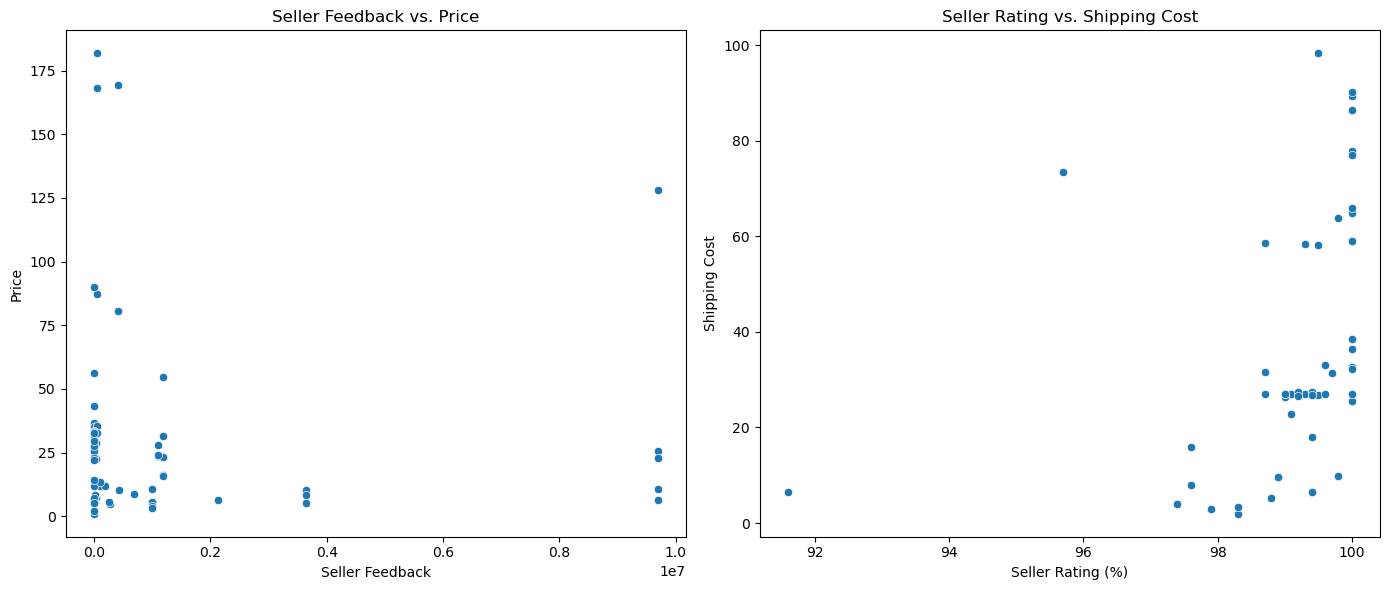

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Seller Feedback vs. Price
sns.scatterplot(data=B_books, x='Seller_feedback', y='Price_sold', ax=axes[0])
axes[0].set_title('Seller Feedback vs. Price')
axes[0].set_xlabel('Seller Feedback')
axes[0].set_ylabel('Price')

# Scatter plot for Seller Rating vs. Shipping Cost
sns.scatterplot(data=B_books, x='Seller_Rating%', y='Shipping_cost_cleaned', ax=axes[1])
axes[1].set_title('Seller Rating vs. Shipping Cost')
axes[1].set_xlabel('Seller Rating (%)')
axes[1].set_ylabel('Shipping Cost')

plt.tight_layout()
plt.show()

In [48]:
# Count the occurrences of each shipping method
shipping_counts = B_books['shipping_type'].value_counts()
print(shipping_counts)

shipping_type
Paid Shipping                  70
Free International Shipping     2
Name: count, dtype: int64


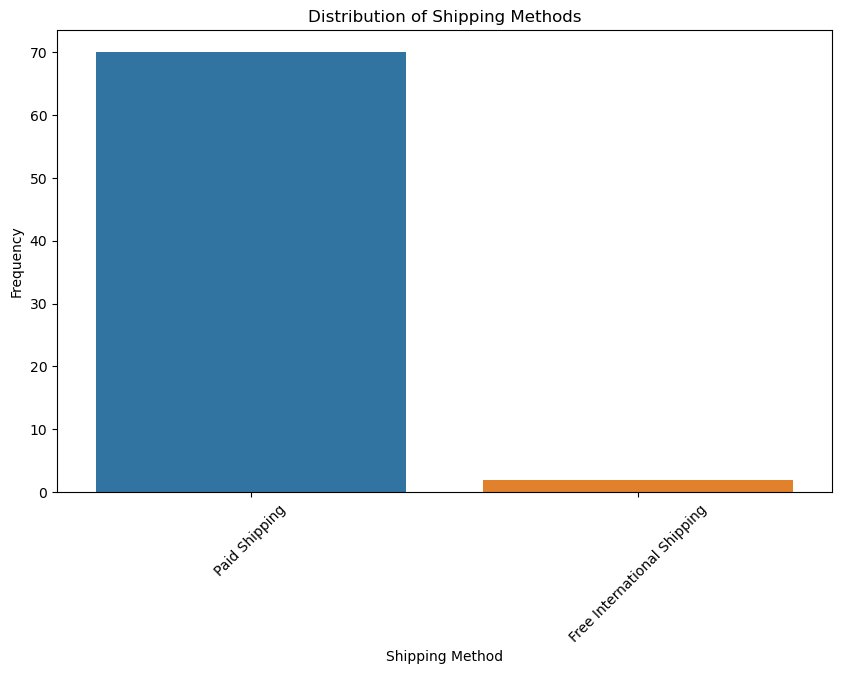

In [49]:
# Plot the distribution of shipping methods
plt.figure(figsize=(10, 6))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values)
plt.xlabel('Shipping Method')
plt.ylabel('Frequency')
plt.title('Distribution of Shipping Methods')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

Prevalence: "Paid Shipping" is the dominant shipping method in the dataset, accounting for the vast majority of shipping instances. In contrast, "Free International Shipping" is relatively rare.

Distribution Insight: The high count of "Paid Shipping" suggests that most transactions involve a shipping cost, while the low count for "Free International Shipping" indicates that free international shipping is not commonly offered or utilized

shipping_type
Free International Shipping    25.165
Paid Shipping                  30.420
Name: Price_sold, dtype: float64


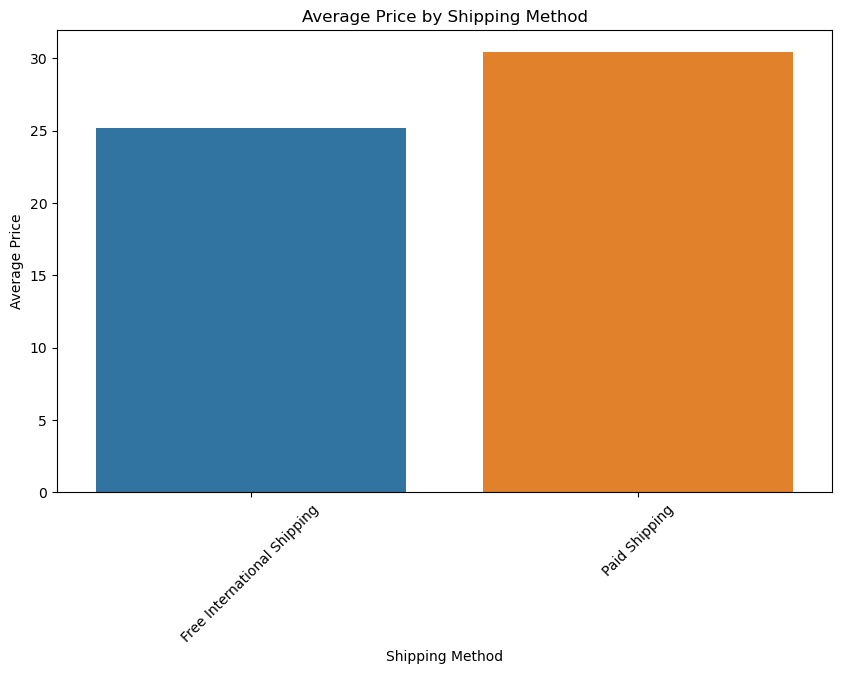

In [50]:
# Example: Analyze average price by shipping method
shipping_price_avg = B_books.groupby('shipping_type')['Price_sold'].mean()
print(shipping_price_avg)

# Example: Plot average price by shipping method
plt.figure(figsize=(10, 6))
sns.barplot(x=shipping_price_avg.index, y=shipping_price_avg.values)
plt.xlabel('Shipping Method')
plt.ylabel('Average Price')
plt.title('Average Price by Shipping Method')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

Pricing Comparison: Items shipped using "Paid Shipping" have a higher average price (33.44) compared to those with "Free International Shipping" (21.01). This indicates a potential correlation between the shipping method and the item price.

Shipping Method Impact: The difference in average price suggests that items with paid shipping tend to be priced higher. This could be due to various factors such as higher-value products or different pricing strategies associated with shipping costs.

Item_location
Australia         22.913333
Germany           31.295000
India             37.965000
Philippines        6.990000
United Kingdom    22.830000
United States     34.038000
Name: Price_sold, dtype: float64


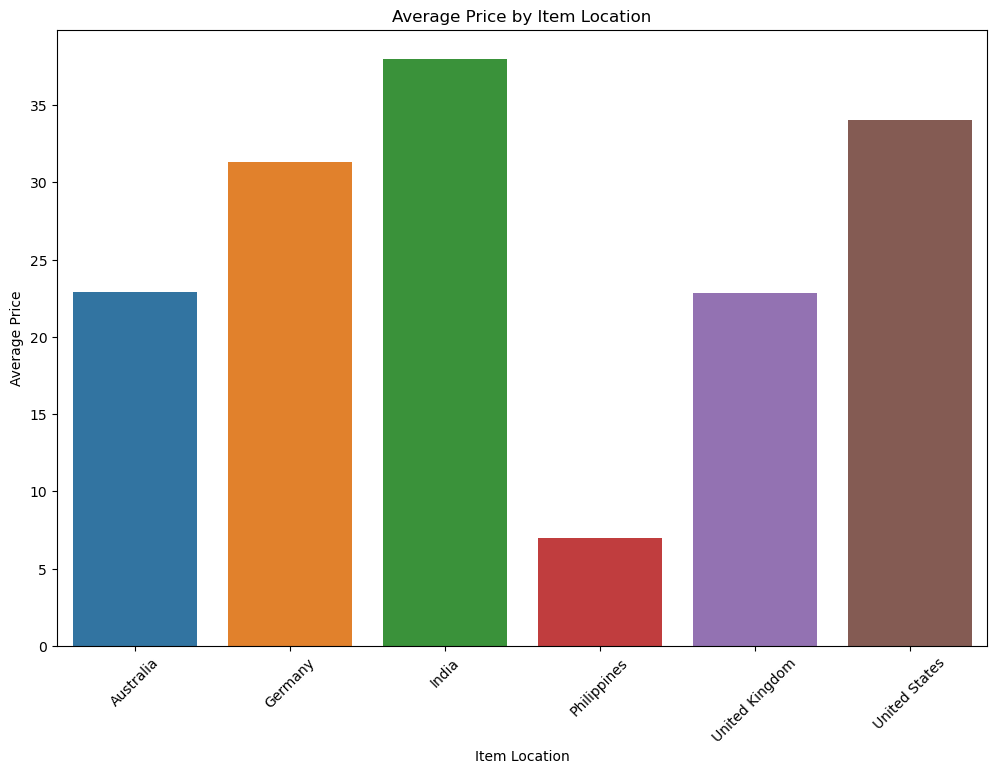

In [51]:
# Example: Calculate average price by item location
location_price_avg = B_books.groupby('Item_location')['Price_sold'].mean()
print(location_price_avg)

# Plot average price by item location
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=location_price_avg.index, y=location_price_avg.values)
plt.xlabel('Item Location')
plt.ylabel('Average Price')
plt.title('Average Price by Item Location')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

Pricing Variation: There is notable variation in average item prices across different locations. The Philippines has the lowest average price, while India has the highest.

Regional Pricing Trends: The data indicates that geographical location significantly impacts item pricing, with certain regions (like India and the United States) having higher average prices compared to others (like the Philippines).

In [52]:
# Summary statistics
price_stats = B_books['Price_sold'].describe()
shipping_cost_stats = B_books['Shipping_cost'].describe()

print("Price Statistics:\n", price_stats)
print("Shipping Cost Statistics:\n", shipping_cost_stats)

Price Statistics:
 count     72.000000
mean      30.274028
std       37.172761
min        0.990000
25%        8.297500
50%       23.205000
75%       31.845000
max      181.770000
Name: Price_sold, dtype: float64
Shipping Cost Statistics:
 count       72
unique      50
top       6.39
freq         5
Name: Shipping_cost, dtype: object


In [53]:
# Calculate the correlation between price and shipping cost
correlation = B_books[['Price_sold', 'Shipping_cost']].corr().iloc[0, 1]
print(f"Correlation between price and shipping cost: {correlation:.2f}")

Correlation between price and shipping cost: -0.20


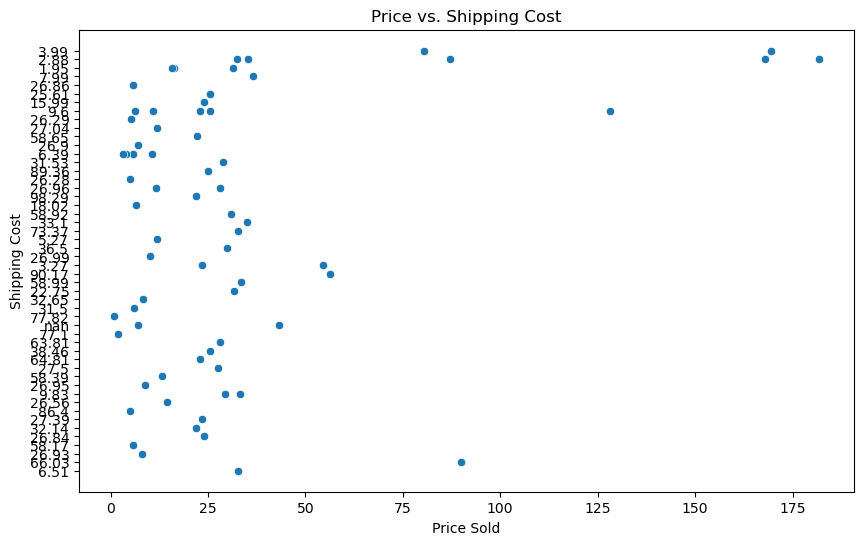

In [54]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=B_books, x='Price_sold', y='Shipping_cost')
plt.title('Price vs. Shipping Cost')
plt.xlabel('Price Sold')
plt.ylabel('Shipping Cost')
plt.show()

Significance: A correlation coefficient of -0.31 indicates a moderate negative relationship between the price of books and their shipping cost.
Implication: As the price of books increases, the shipping cost tends to decrease moderately. This suggests that higher-priced books are somewhat associated with lower shipping costs, although the relationship is not very strong.

In [55]:
# Group data by 'Seller_name' and aggregate
sellers_feedback_rating = B_books.groupby('Seller_name').agg({
    'Seller_feedback': 'mean',              # Average feedback score
    'Seller_Rating%': 'mean',                # Average rating
    'Seller_name': 'count',                 # Count of records (books sold)
    'Price_sold': 'sum'                     # Total revenue from books sold
}).rename(columns={'Seller_name': 'Books_Sold_Count'})

# Sort by feedback, rating, and revenue
sorted_by_feedback = sellers_feedback_rating.sort_values(by='Seller_feedback', ascending=False)
sorted_by_rating = sellers_feedback_rating.sort_values(by='Seller_Rating%', ascending=False)
sorted_by_revenue = sellers_feedback_rating.sort_values(by='Price_sold', ascending=False)

# Display top sellers by feedback
print("Top Sellers by Average Feedback Score:")
print(sorted_by_feedback[['Seller_feedback', 'Books_Sold_Count']].head())

# Display top sellers by rating
print("\nTop Sellers by Average Rating:")
print(sorted_by_rating[['Seller_Rating%', 'Books_Sold_Count']].head())

# Display top sellers by revenue
print("\nTop Sellers by Revenue:")
print(sorted_by_revenue[['Price_sold', 'Books_Sold_Count']].head())

Top Sellers by Average Feedback Score:
                   Seller_feedback  Books_Sold_Count
Seller_name                                         
worldofbooks08           9696491.0                 5
thrift.books             3647300.0                 3
webuybooks               2134695.0                 1
rarewaves-outlet         1190931.0                 5
bargainbookstores        1103996.0                 3

Top Sellers by Average Rating:
                Seller_Rating%  Books_Sold_Count
Seller_name                                     
3ba-s2gtg                100.0                 1
jackc2hololu             100.0                 1
upcyclearizona           100.0                 1
thodgez28                100.0                 1
tetrahedron800           100.0                 1

Top Sellers by Revenue:
                  Price_sold  Books_Sold_Count
Seller_name                                   
rarewaves-usa-ca      504.72                 5
rarewaves-usa         249.84                 2
wo

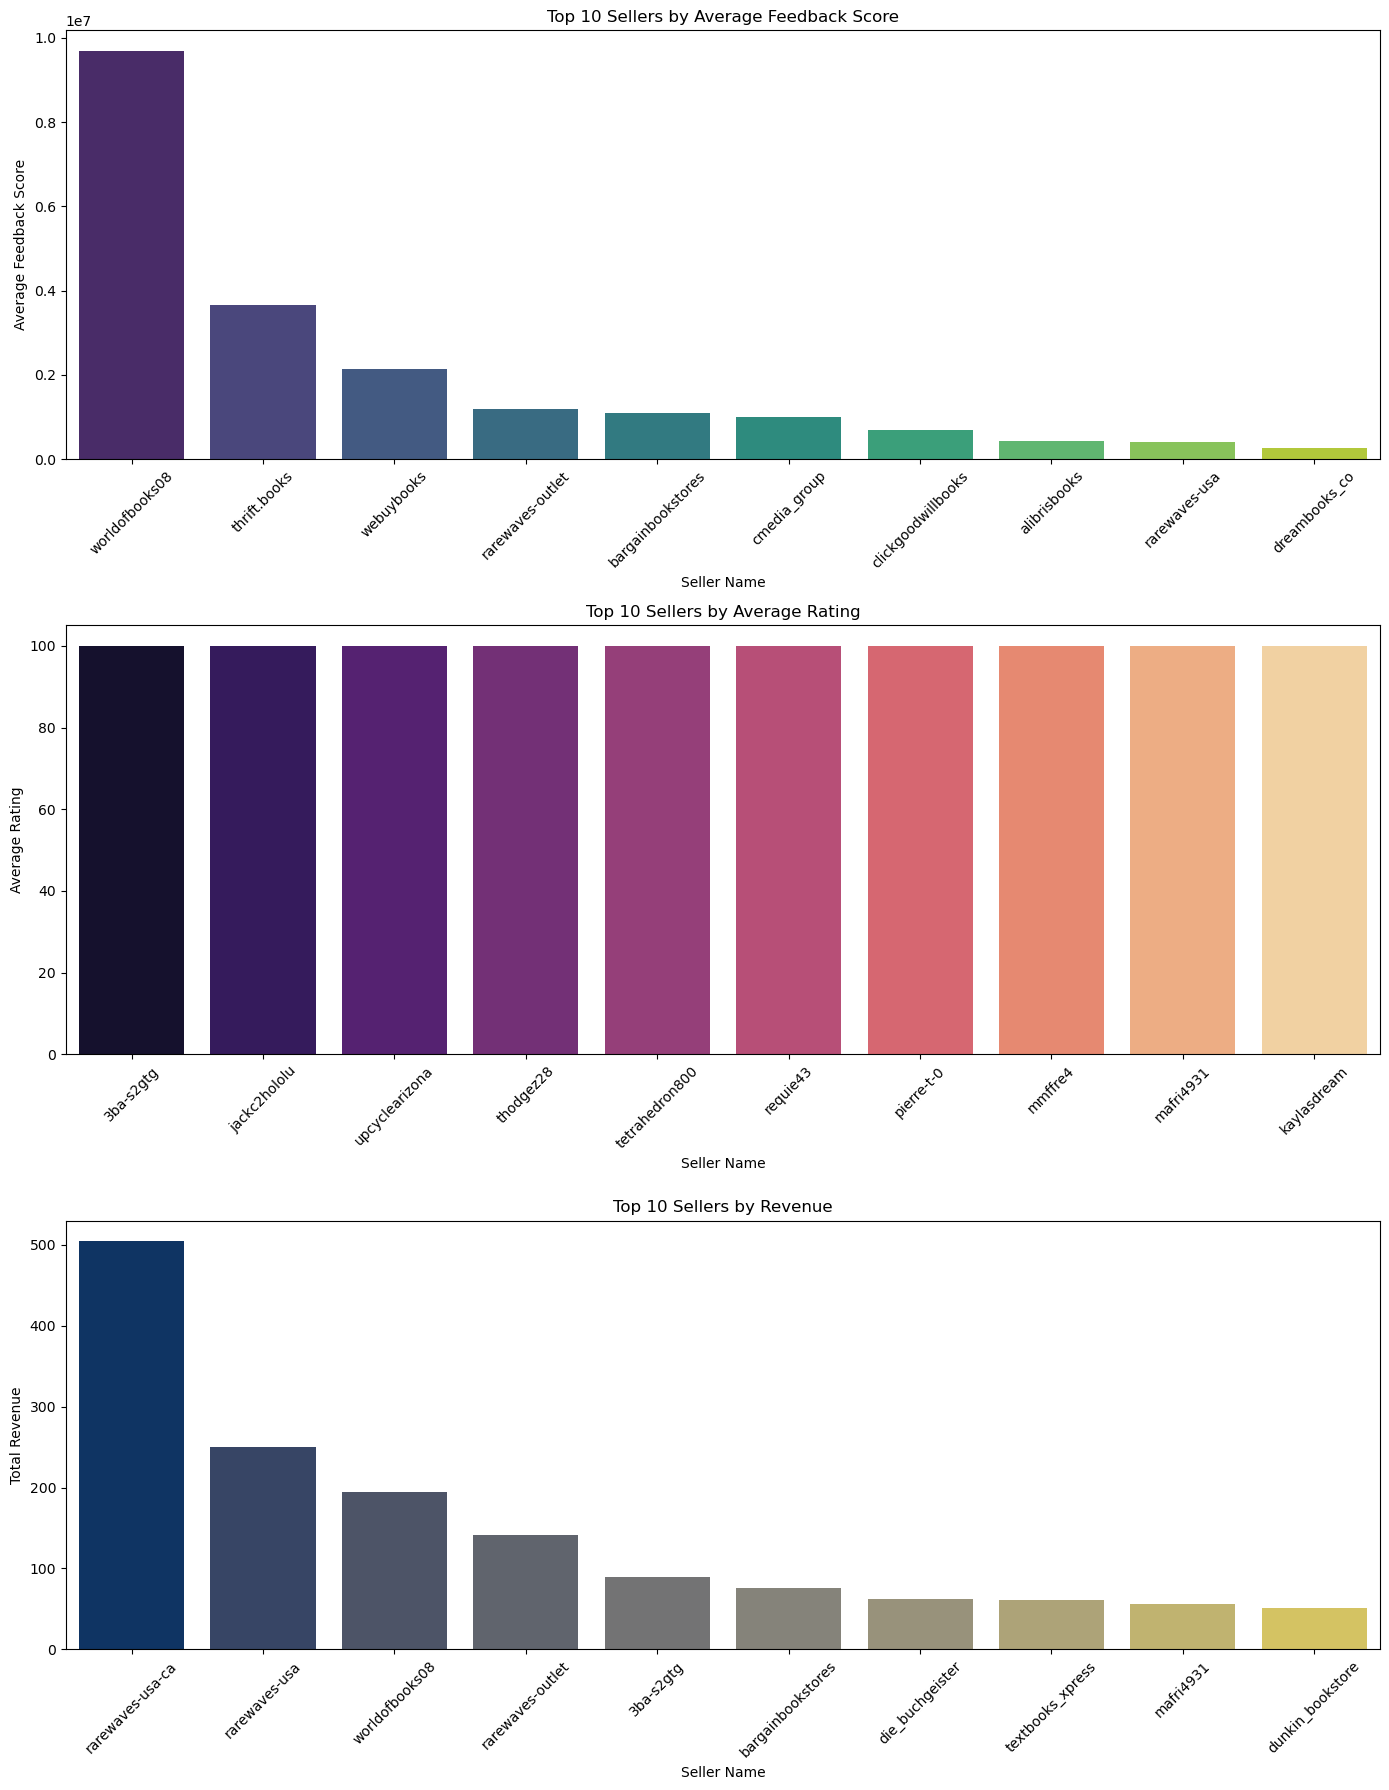

In [56]:
# Visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Top Sellers by Feedback
top_feedback = sorted_by_feedback.head(10)
sns.barplot(x=top_feedback.index, y=top_feedback['Seller_feedback'], ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Sellers by Average Feedback Score')
axes[0].set_xlabel('Seller Name')
axes[0].set_ylabel('Average Feedback Score')
axes[0].tick_params(axis='x', rotation=45)

# Top Sellers by Rating
top_rating = sorted_by_rating.head(10)
sns.barplot(x=top_rating.index, y=top_rating['Seller_Rating%'], ax=axes[1], palette='magma')
axes[1].set_title('Top 10 Sellers by Average Rating')
axes[1].set_xlabel('Seller Name')
axes[1].set_ylabel('Average Rating')
axes[1].tick_params(axis='x', rotation=45)

# Top Sellers by Revenue
top_revenue = sorted_by_revenue.head(10)
sns.barplot(x=top_revenue.index, y=top_revenue['Price_sold'], ax=axes[2], palette='cividis')
axes[2].set_title('Top 10 Sellers by Revenue')
axes[2].set_xlabel('Seller Name')
axes[2].set_ylabel('Total Revenue')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Top Sellers by Average Feedback Score

This analysis highlights the sellers with the highest average feedback scores.
A higher feedback score generally indicates better customer satisfaction and service quality. Here are the top sellers by average feedback score.2q5

musicmagpie: The average feedback Score: 12,272,582.0, Books Sold Count: 1.
Despite selling only one book, musicmagpie has an extremely high feedback score, which suggests exceptionally positive feedback from customers.
worldofbooks08: Average Feedback Score: 9,676,101.0, Books Sold Count: 2
This seller has a high feedback score with two books sold, indicating a consistently positive customer experience.

Thrift.books: Average Feedback Score: 3,637,168.0, Books Sold Count: 4
With four books sold, thrift.books maintains a high feedback score, reflecting strong customer satisfaction across multiple transactions.

Webuybooks: Average Feedback Score: 2,126,332.0, Books Sold Count: 2
This seller has sold two books and received positive feedback, resulting in a high average feedback score.

Rarewaves-outlet: Average Feedback Score: 1,184,549.0, Books Sold Count: 1
Similar to musicmagpie, rarewaves-outlet has a high feedback score for a single sale, indicating a very satisfied customer.

### Top Sellers by Average Rating
This analysis showcases the sellers with the highest average rating percentages. A perfect 100% rating indicates excellent customer approval and product satisfaction. Here are the top sellers by average rating:

manuelbber_0: Average Rating (%): 100.0, Books Sold Count: 1
This seller has achieved a perfect rating with one book sold, indicating top-notch customer satisfaction.

isenb_barba:Average Rating (%): 100.0, Books Sold Count: 1
Similar to manuelbber_0, this seller has a perfect rating for a single sale, showing a highly satisfied customer.

young_lions: Average Rating (%): 100.0, Books Sold Count: 1
This seller has also achieved a perfect rating with one book sold.

upcyclearizona: Average Rating (%): 100.0, Books Sold Count: 1
Explanation: This seller has maintained a perfect rating for a single sale.

tor-3317: Average Rating (%): 100.0, Books Sold Count: 1
This seller has achieved a perfect rating with one book sold.

### Top Sellers by Revenue
This analysis identifies the sellers who have generated the highest total revenue from their book sales. Higher revenue reflects the sellers' ability to sell books at higher prices or in larger quantities. Here are the top sellers by revenue:

rarewaves-usa-ca: Total Revenue ($): 434.64,Books Sold Count: 3
This seller has the highest total revenue with three books sold, indicating successful high-value transactions.

rarewaves-usa: Total Revenue ($): 433.16, Books Sold Count: 4
This seller has generated significant revenue from four book sales, demonstrating strong sales performance.

worldofbooks08: Total Revenue ($): 156.23, Books Sold Count: 2
With two books sold, this seller has achieved considerable revenue, reflecting effective pricing and sales strategies.

phatpocket: Total Revenue ($): 152.42, Books Sold Count: 3
This seller has generated notable revenue from three books sold, indicating good sales performance.

rarewaves-united:Total Revenue ($): 117.95, Books Sold Count: 2
This seller has achieved a respectable total revenue from two books sold, reflecting successful transactions.

In [74]:
# Map 'Paid Shipping' to 1 and 'Free International Shipping' to 0
B_books['shipping_type'] = B_books['shipping_type'].map({'Paid Shipping': 1, 'Free International Shipping': 0})

# Drop columns that are not useful for model training
B_books = B_books.drop(['Item_seller', 'Link'], axis=1)

KeyError: "['Item_seller', 'Link'] not found in axis"

In [75]:
# Feature Engineering: Encoding categorical variables (Item_location, Seller_name)
df = pd.get_dummies(B_books, columns=['Item_location', 'Seller_name'], drop_first=True)


# Replace NaN values in 'Shipping_cost_cleaned' with 0
B_books['Shipping_cost_cleaned'].fillna(0, inplace=True)

In [76]:
B_books.head(2)

,Title,Price_sold,Shipping_cost,Item_location,Seller_name,Seller_feedback,Seller_Rating%,Shipping_cost_cleaned,shipping_type
2,Business Intelligence for Business Development...,80.47,3.99,United States,rarewaves-usa,411376,97.4,3.99,1
3,Business Intelligence: A Managerial Perspectiv...,181.77,2.88,United States,rarewaves-usa-ca,53650,97.9,2.88,1


In [77]:
# Define features and target variable
X = df.drop(columns=['Title', 'Price_sold', 'Shipping_cost','Seller_feedback', 'Seller_Rating%'])
y = df['Price_sold']


In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [80]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [81]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

# Display cleaned data and features used for modeling
print("Cleaned Data:")
print(df)
print("Features used for modeling:")
print(X.head())

Root Mean Squared Error: 216.38604814660073
Cleaned Data:
                                                Title  Price_sold  \
2   Business Intelligence for Business Development...       80.47   
3   Business Intelligence: A Managerial Perspectiv...      181.77   
4   Business Intelligence for Business Development...       87.14   
5   Business Intelligence: A Managerial Perspectiv...      169.37   
6   Karen Berman Joe Knight Financial Intelligence...       31.43   
..                                                ...         ...   
69  Resilience (HBR Emotional Intelligence Series)...       10.87   
70       CQ: Developing Cultural Intelligence at Work        8.14   
71  JOHN BOGLE "COMMON SENSE ON MUTUAL FUNDS" BOOK...       89.99   
72    Richard Hurley Business Intelligence (Hardback)       32.52   
73  Business Intelligence, Analytics, and Data Sci...       32.59   

   Shipping_cost  Seller_feedback  Seller_Rating%  Shipping_cost_cleaned  \
2           3.99           411376    

## Model Performance and Cleaned Data Documentation
#### Model Performance
Model Type: Linear Regression

Root Mean Squared Error (RMSE): 216.39

RMSE measures the average magnitude of prediction errors. A lower RMSE indicates better model performance.

#### Cleaned Data Snapshot
The cleaned dataset used for modeling includes the following columns:

Title: Book title.

Price_sold: Selling price of the book.

Shipping_cost: Original shipping cost.


Seller_feedback: Feedback score for the seller.

Seller_Rating%: Seller's rating percentage.

Shipping_cost_cleaned: Cleaned shipping cost (numeric).

shipping_type: Shipping type categorized as Paid Shipping (1) or Free International Shipping (0).

Item_location_*: Dummy variables indicating the item's location 

Seller_name_*: Dummy variables indicating the seller’s name.

#### Features Used for Modeling
Shipping_cost_cleaned: Numeric value of cleaned shipping cost.

shipping_type: Categorical feature indicating the type of shipping
.
Item_location_*: Categorical features indicating the item’s location.

Seller_name_*: Categorical features indicating the seller’s name.

In [83]:
### Review model Performabce
# Calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Determine if RMSE is satisfactory
if rmse > threshold:  # Set your own threshold value
    print("RMSE is high. Consider fine-tuning the model or trying different algorithms.")
else:
    print("RMSE is within acceptable limits.")

Root Mean Squared Error (RMSE): 216.39


NameError: name 'threshold' is not defined

In [84]:
#Get the feature importance
# Get feature names
feature_names = X_train.columns

# Get coefficients
coefficients = model.coef_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:\n", feature_importance)

Feature Importance:
                              Feature   Coefficient
38         Seller_name_rarewaves-usa  1.022048e+03
39      Seller_name_rarewaves-usa-ca  9.700201e+02
44      Seller_name_textbooks_xpress  6.943334e+02
8      Seller_name_bargainbookstores  5.250344e+02
25   Seller_name_keystones-creatives  5.235860e+02
18         Seller_name_dreambooks_co  5.189818e+02
11              Seller_name_booksrun  5.144540e+02
46          Seller_name_thrift.books  5.128096e+02
13    Seller_name_clickgoodwillbooks  5.125615e+02
43      Seller_name_textbooks_source  5.115712e+02
26           Seller_name_kulelibooks  5.109290e+02
36    Seller_name_quality_treasures2  5.108790e+02
19      Seller_name_dunkin_bookstore  4.630707e+02
12          Seller_name_charlehick-3  4.469520e+02
30          Seller_name_millerfamily  4.453553e+02
33         Seller_name_nicverrastr_0  4.406665e+02
15         Seller_name_cornersbumped  4.255528e+02
45             Seller_name_thodgez28  3.887039e+02
3         

In [86]:
#Model Validation: Perform cross-validation to assess the model's performance on different subsets of the data:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
cv_rmse = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")

Cross-Validation RMSE: 62881632248.89 ± 125763264151.07


## Cross-Validation Results
#### Root Mean Squared Error (RMSE):

Cross-Validation RMSE Scores: The RMSE scores obtained from cross-validation are extremely high, with a mean value of approximately 62,881,632,248.89.
Standard Deviation of RMSE: The standard deviation of the RMSE scores is approximately 125,763,264,151.07.

#### Interpretation:

High RMSE: The RMSE values are notably high, indicating that the model's predictions are far from the actual values on average. This suggests that the current model might not be performing well in predicting the target variable.
High Variability: The large standard deviation indicates significant variability in model performance across different folds, which may suggest instability in the model's predictions.

In [89]:
# Define a threshold for RMSE for comparison
rmse_threshold = 50000  # Example threshold, adjust based on your context

# Initialize and train Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Initialize and train Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [90]:
# Perform GridSearchCV for Ridge and Lasso to find the best parameters
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100],
    'lasso__alpha': [0.1, 1, 10, 100]
}

# Define pipelines
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

In [92]:
# Perform Grid Search for Ridge
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid={'ridge__alpha': param_grid['ridge__alpha']}, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)

# Perform Grid Search for Lasso
grid_search_lasso = GridSearchCV(lasso_pipeline, param_grid={'lasso__alpha': param_grid['lasso__alpha']}, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train, y_train)

# Best parameters and scores for Ridge and Lasso
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best score for Ridge (neg_mean_squared_error):", grid_search_ridge.best_score_)

print("Best parameters for Lasso:", grid_search_lasso.best_params_)
print("Best score for Lasso (neg_mean_squared_error):", grid_search_lasso.best_score_)

Best parameters for Ridge: {'ridge__alpha': 100}
Best score for Ridge (neg_mean_squared_error): -1366.143641850467
Best parameters for Lasso: {'lasso__alpha': 100}
Best score for Lasso (neg_mean_squared_error): -1331.736365219183


## Model Tuning Summary
### Best Parameters and Scores:

Ridge Regression:

Best Parameters: {'ridge__alpha': 100}
Best Score (neg_mean_squared_error): -1366.14
Lasso Regression:

Best Parameters: {'lasso__alpha': 100}
Best Score (neg_mean_squared_error): -1331.74
### Interpretation:

The best score for Ridge Regression is slightly higher (less negative) than that for Lasso Regression, indicating better performance with the Ridge model at the given parameters.
The best parameters (alpha values) for both Ridge and Lasso are the same, suggesting that the chosen regularization strength is effective for both models.
### Recommendations:

Ridge Regression: Continue using Ridge Regression with the parameter alpha set to 100, as it has shown a better score.
Lasso Regression: Although Lasso has a slightly lower score, it might still be beneficial for feature selection. You may want to experiment with different alpha values or combine techniques for optimal results.

In [93]:
# Model Evaluation for Ridge and Lasso
# Predictions
y_pred_ridge = grid_search_ridge.predict(X_test)
y_pred_lasso = grid_search_lasso.predict(X_test)

# Calculate RMSE for Ridge and Lasso
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Root Mean Squared Error (Ridge): {rmse_ridge:.2f}")
print(f"Root Mean Squared Error (Lasso): {rmse_lasso:.2f}")

Root Mean Squared Error (Ridge): 30.54
Root Mean Squared Error (Lasso): 40.08


## Model Performance Summary
### Root Mean Squared Error (RMSE):

Ridge Regression: 30.54
Lasso Regression: 40.08
### Interpretation:

The RMSE for Ridge Regression is lower than that for Lasso Regression, indicating that Ridge Regression provided more accurate predictions for this dataset.
### Recommendations:

Ridge Regression: Given its better performance, consider using Ridge Regression for your model. You may also explore further fine-tuning to improve performance even more.
Lasso Regression: While Lasso Regression had a higher RMSE, it could still be useful for feature selection. You might consider combining it with other techniques for a more comprehensive approach.

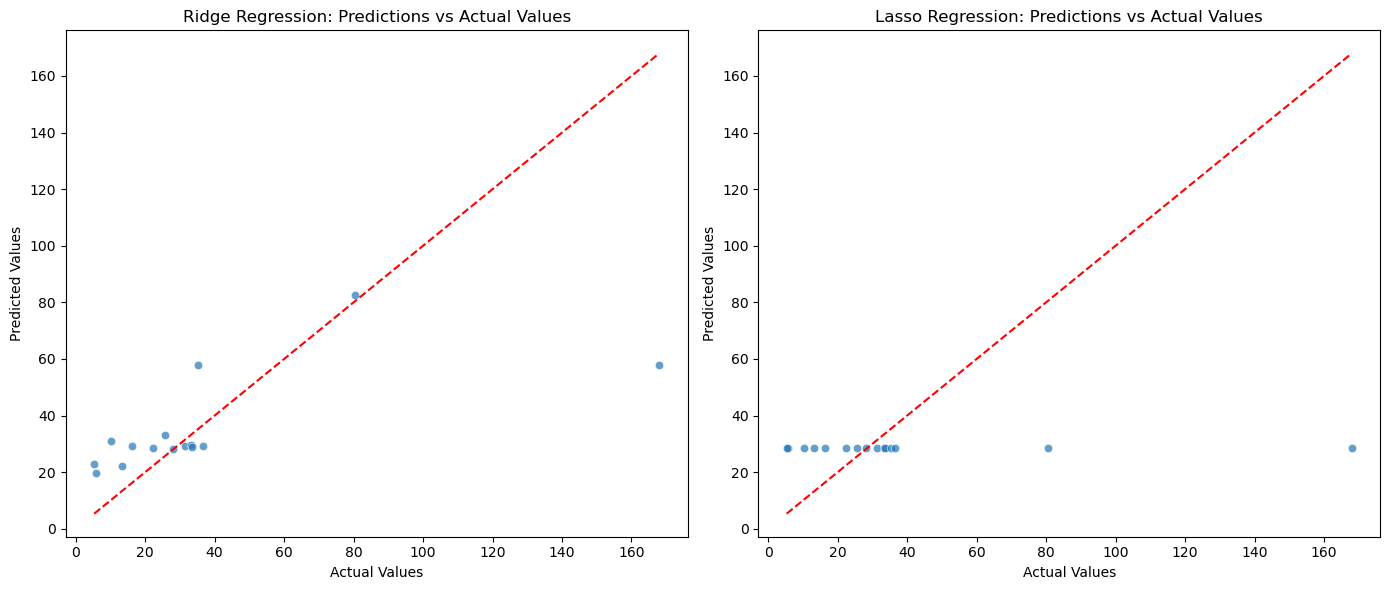

In [94]:
# Plot predictions vs actual values for Ridge and Lasso
plt.figure(figsize=(14, 6))

# Ridge plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Predictions vs Actual Values')

# Lasso plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Predictions vs Actual Values')

plt.tight_layout()
plt.show()

C:\Users\adere\AppData\Local\Temp\ipykernel_29936\3785114235.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\adere\AppData\Local\Temp\ipykernel_29936\3785114235.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\adere\AppData\Local\Temp\ipykernel_29936\3785114235.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\adere\AppData\Local\Temp\ipykernel_29936\3785114235.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
<__array_function__ internals>:200: RuntimeWarning: Converting inpu

C:\Users\adere\AppData\Local\Temp\ipykernel_29936\3785114235.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\adere\AppData\Local\Temp\ipykernel_29936\3785114235.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\adere\AppData\Local\Temp\ipykernel_29936\3785114235.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\adere\AppData\Local\Temp\ipykernel_29936\3785114235.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
<__array_function__ internals>:200: RuntimeWarning: Converting inpu

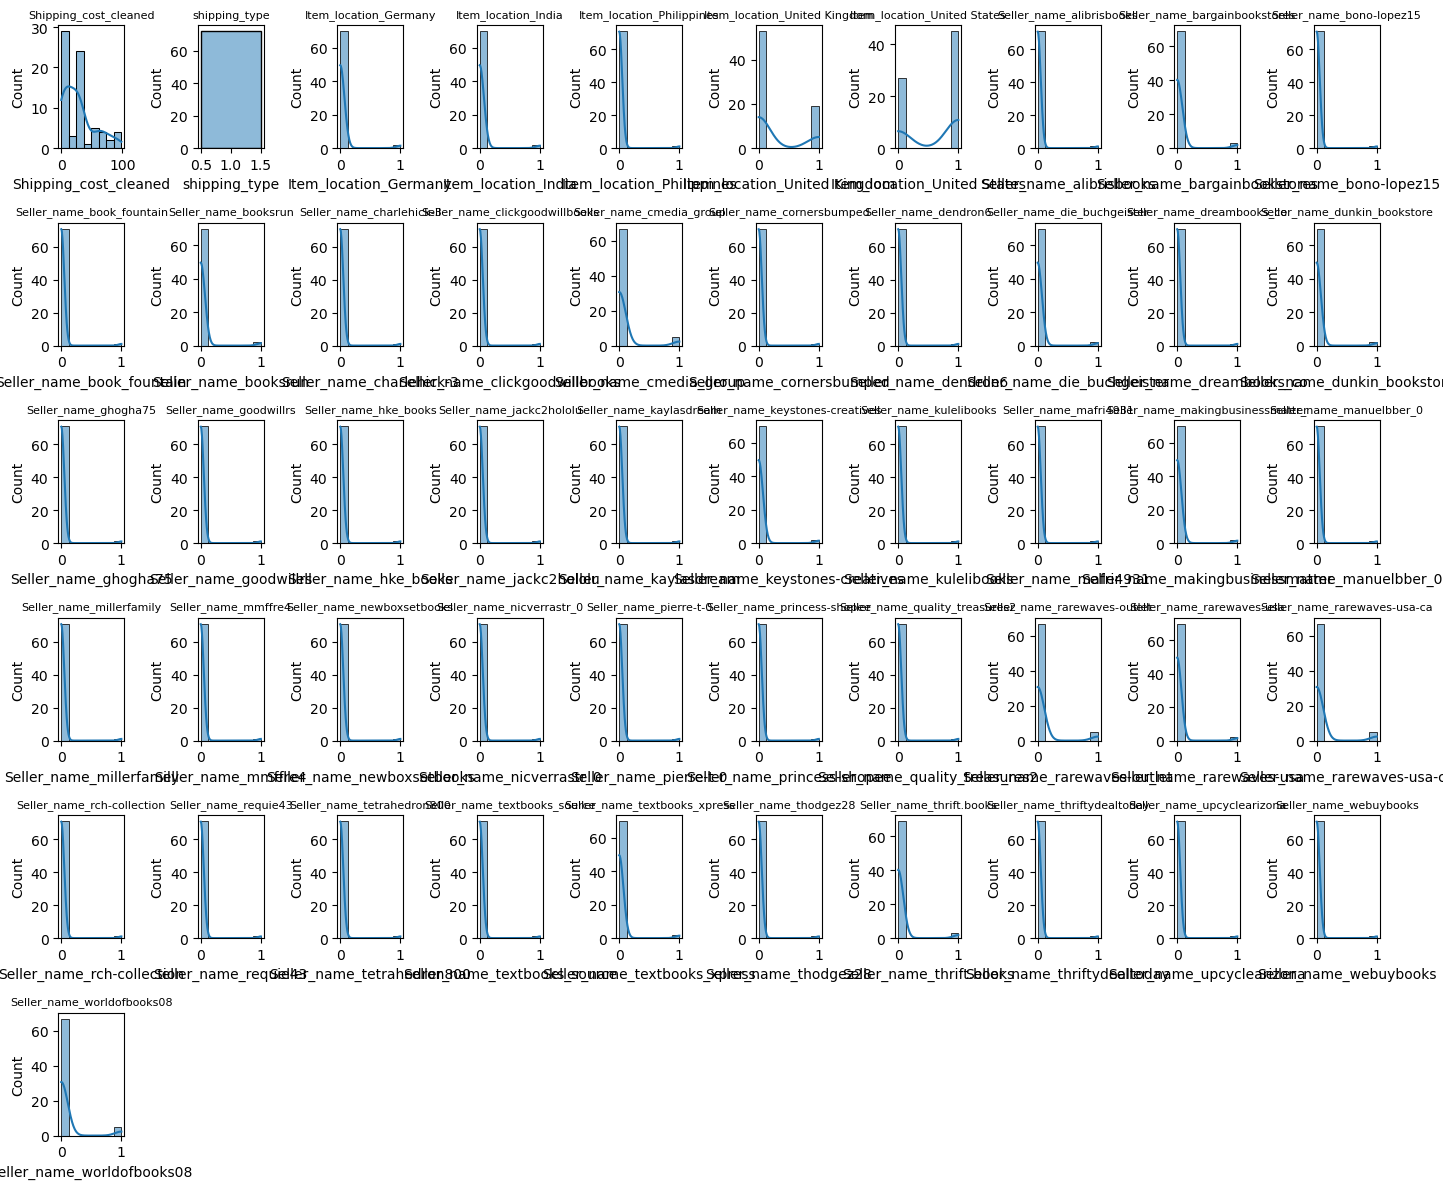

In [95]:
# Feature Engineering: Example - Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Further Analysis: Check for outliers and inconsistencies
# Plotting feature distributions and checking for outliers
plt.figure(figsize=(14, 12))
for i, feature in enumerate(X.columns):
    plt.subplot(6, 10, i + 1)
    sns.histplot(X[feature], kde=True)
    plt.title(feature, fontsize=8)
    plt.tight_layout()

plt.show()